May Berger
 - Copilot
 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [3]:
feature = mushrooms_df.drop(columns=['type'])
target = mushrooms_df['type']

In [4]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(feature)
encoded_target = encoder.fit_transform(target.values.reshape(-1, 1))
print(encoded_data)


[[5. 2. 4. ... 2. 3. 5.]
 [5. 2. 9. ... 3. 2. 1.]
 [0. 2. 8. ... 3. 2. 3.]
 ...
 [2. 2. 4. ... 0. 1. 2.]
 [3. 3. 4. ... 7. 4. 2.]
 [5. 2. 4. ... 4. 1. 2.]]


In [5]:
X = encoded_data
y = encoded_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegressionCV(max_iter=10000, scoring='accuracy', cv=5)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print('Logistic Regression', accuracy_score(y_test, log_reg_pred))

/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression 0.9661538461538461


In [6]:
dt_params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)
dt_pred = dt_grid.predict(X_test)
print('Decision Tree', accuracy_score(y_test, dt_pred))

Decision Tree 1.0


In [7]:
rf_params = {'n_estimators': [10, 20, 30, 40, 50],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
print('Random Forest', accuracy_score(y_test, rf_pred))

/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Random Forest 1.0


/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mayberger/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


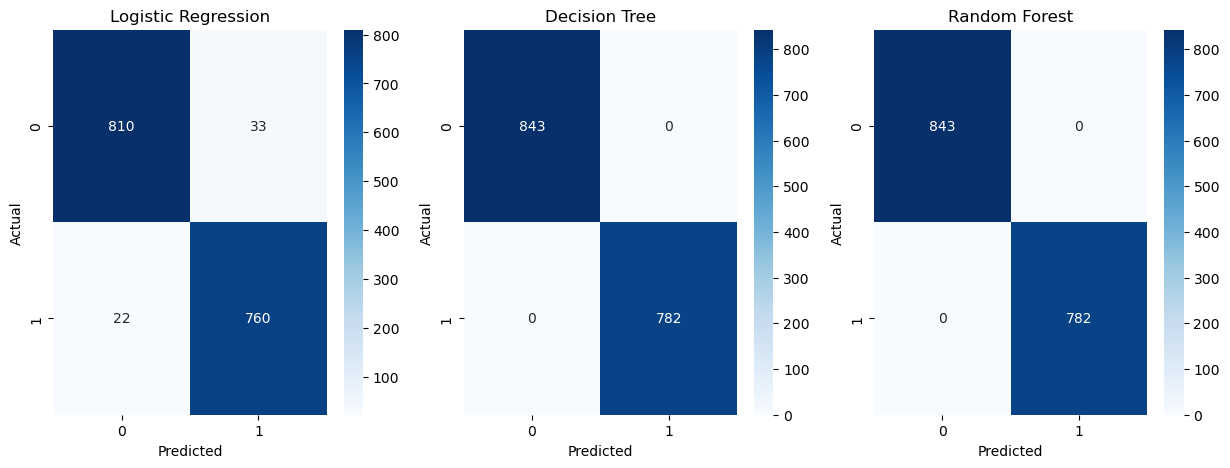

In [8]:
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(log_reg_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(dt_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.show()

In [9]:
def compute_precision_recall_f1(cm):
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1
log_reg_precision, log_reg_recall, log_reg_f1 = compute_precision_recall_f1(log_reg_cm)
dt_precision, dt_recall, dt_f1 = compute_precision_recall_f1(dt_cm)
rf_precision, rf_recall, rf_f1 = compute_precision_recall_f1(rf_cm)
print(f'Logistic Regression - Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1: {log_reg_f1}')
print(f'Decision Tree - Precision: {dt_precision}, Recall: {dt_recall}, F1: {dt_f1}')
print(f'Random Forest - Precision: {rf_precision}, Recall: {rf_recall}, F1: {rf_f1}')

Logistic Regression - Precision: 0.9583858764186634, Recall: 0.9718670076726342, F1: 0.9650793650793651
Decision Tree - Precision: 1.0, Recall: 1.0, F1: 1.0
Random Forest - Precision: 1.0, Recall: 1.0, F1: 1.0


Ordinal variables include gill_spacing, gill_size, ring_number, and population. The rest of the variables are categorical.

### Problem 1 questions

 - Which model was best?

 - What were the hyper-parameters of this model.

 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: Decision trees & Random forests
- Hyper-parameters:
    -  For the decision trees:
        - max_depth = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
        - min_samples_split = 2, 3, 4, 5, 6, 7, 8, 9, 10 

    - For the random forests:
        - n_estimators = 10, 20, 30, 40, 50 
        - max_depth = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
        - min_samples_split = 2, 3, 4, 5, 6, 7, 8, 9, 10

- Metrics
    - Accuracy: 1.00 for both
    - Recall: 1.00 for both
    - Precision: 1.00 for both
- How did you decide best? 
    - I decided best based on the overall accuracy and it appears that both my decision trees and random forests got almost a perfect score which seems to be incorrect somehow but they appear to be incredbly successful. 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [42]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

for k, col in enumerate(nfl_draft.columns):
    print(f'{k:>3}. {col} - {nfl_draft[col].unique()}')

  0. Unnamed: 0 - [   0    1    2 ... 2798 2799 2800]
  1. round - [1 2 3 4 5 6 7]
  2. season - [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2022 2021 2020 2019 2018 2017 2023 2024]
  3. name - ['Dewayne Robertson' 'Terence Newman' 'Johnathan Sullivan' ...
 'Jaylen Harrell' 'Kalen King' 'Jaylen Key']
  4. age - [21. 25. 22. 23. 20. 24. nan 26.]
  5. position - ['DL' 'DB' 'LB']
  6. college_conference - [nan 'Big Twelve Conference' 'Pacific Ten Conference'
 'Mid-Eastern Athletic Conference' 'Atlantic Coast Conference'
 'Southeastern Conference' 'Big Sky Conference' 'Big East'
 'Sun Belt Conference' 'Big Ten Conference' 'Independent'
 'Pacific Twelve Conference' 'Ivy League' 'Colonial Athletic Association'
 'Ohio Valley Conference' 'Mid-American Conference'
 'Western Athletic Conference' 'Conference USA' 'Mountain West Conference'
 'Southland Conference' 'American Athletic Conference'
 'Southern Conference' 'Gulf South Conference' 'Big South Conference'
 'Mid-

In [49]:
nfl_draft = nfl_draft.fillna(0)

In [50]:
nfl_target = nfl_draft['round']
nfl_feature = nfl_draft.drop(columns=['round','position', 'name', 'college_conference'])

In [51]:
X2 = nfl_feature
y2 = nfl_target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [52]:
rf_param2 = {'n_estimators': [10, 20, 30, 40, 50],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
rf2 = RandomForestClassifier(random_state=42)
rf_grid2 = GridSearchCV(rf2, rf_param2, scoring='accuracy', cv=5)
rf_grid2.fit(X_train2, y_train2)
rf_pred2 = rf_grid2.predict(X_test2)
print('Random Forest', accuracy_score(y_test2, rf_pred2))

Random Forest 0.24945770065075923


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    - I chose the Random Forests model  because it was one of the models that I had the best luck with in the first problem so I hoped that it would be accurate for this one as well. Also after emailing Professor Roth he said that the random forests model would be good for datasets that are missing data which is an issue with this one. 
 - What was your accuracy?
    - My accuracy was only 0.249 which is not very good for a model to be but it is better than I expected. 